# Taller de Análisis de Texto con Tweets en Español

Este taller guía a los estudiantes en el análisis de tweets en español, usando técnicas de limpieza de texto, análisis de frecuencia de palabras y análisis de sentimientos. También incluye preguntas orientadas al negocio.

In [ ]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv

--2025-04-27 18:41:02--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv [following]
--2025-04-27 18:41:03--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205292 (200K) [text/plain]
Saving to: ‘Gender_bias_spanish.csv’

Gender_bias_s

## 1. Configuración e Importación de Librerías
Primero, importaremos las librerías necesarias y cargaremos el conjunto de datos.

In [ ]:
!pip install nltk textblob wordcloud
import pandas as pd
import re
from nltk.corpus import stopwords
from textblob import TextBlob
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Cargar el Conjunto de Datos
Cargamos el archivo CSV que contiene los tweets y las etiquetas ('biased' o 'non-biased').

In [ ]:
# Cargar el conjunto de datos (reemplazar 'ruta/del/archivo.csv' con la ruta del archivo real)
tweets = pd.read_csv('Gender_bias_spanish.csv')
tweets.head()

,Contents,Label
0,@chumeltorres ya cabrón! sin tí se reciben las...,biased
1,¿alguien es tan amable de ir a hacerme la comp...,non-biased
2,"@jenniferduquee hahaha, si está rico, nadamas ...",non-biased
3,@evagelcot donde lo ves!!? es mi programa favo...,non-biased
4,como siempre mi tortilla triunfa mas que otros...,non-biased


## 2. Exploración de Datos
Exploraremos el conjunto de datos para entender mejor la distribución de etiquetas y las características de los tweets.

In [ ]:
tweets['Label'].value_counts()

,count
Label,
non-biased,1596
biased,318


**Pregunta:** ¿Qué proporción de tweets son 'biased' y 'non-biased'? ¿Por qué podría ser importante esta proporción para el análisis de texto?

In [54]:
biasedprop = (tweets[tweets['Label'] == 'biased'].count() / tweets.count() * 100).values[0]
non_biasedprop = (tweets[tweets['Label'] == 'non-biased'].count() / tweets.count() * 100).values[0]
print(f"El {biasedprop:.2f}% de los tweets son biased y el {non_biasedprop:.2f}% son non-biased")


El 16.61% de los tweets son biased y el 83.39% son non-biased


**Es importante entender la proporción ya que los tweets sesgados representan una minoria en la que podemos enfocar nuestra estrategia o nuestro analisis para detectar patrones de ellos**

## 3. Preprocesamiento de Texto
Realizamos una serie de pasos para limpiar y preparar el texto para el análisis: limpieza de caracteres especiales, conversión a minúsculas, y eliminación de stopwords.

In [78]:
def limpiar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r'[^\w\s]', '', texto)
    palabras = texto.split()
    palabras = [palabra for palabra in palabras if palabra not in stop_words]
    return palabras

tweets['Contents'] = tweets['Contents'].apply(limpiar_texto)
tweets.head()

,Contents,Label
0,"[chumeltorres, cabrón, tí, reciben, noticias, ...",biased
1,"[alguien, tan, amable, ir, hacerme, compra, ma...",non-biased
2,"[jenniferduquee, hahaha, si, rico, nadamas, fa...",non-biased
3,"[evagelcot, ves, programa, favorito, sólo, enc...",non-biased
4,"[siempre, tortilla, triunfa, mas, platos, play...",non-biased


## 4. Análisis de Frecuencia de Palabras por Etiqueta
Contamos las palabras en tweets 'biased' y 'non-biased' y visualizamos las palabras más comunes.

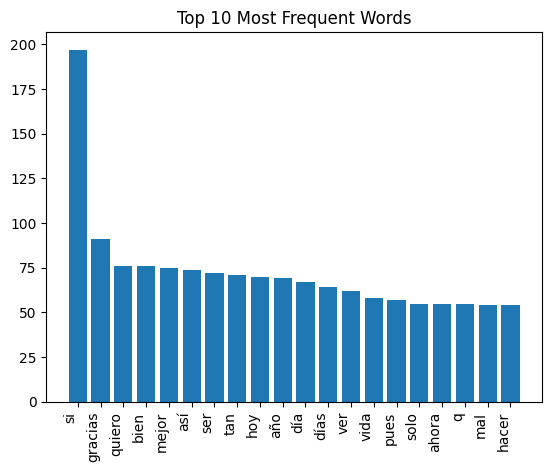

In [85]:
def contar_palabras(df):
    all_words = []
    for text in df['Contents']:
        all_words.extend(text)
    return Counter(all_words)

frecuencias = contar_palabras(tweets)

top_20_words = frecuencias.most_common(20)

words = [word[0] for word in top_20_words]
frequencies = [word[1] for word in top_20_words]

plt.bar(words, frequencies)
plt.title('Top 10 Most Frequent Words')
plt.xticks(rotation=90, ha='right')
plt.show()

**Preguntas de Análisis de Frecuencia:**
- ¿Qué palabras son más comunes en los tweets 'biased' en comparación con los 'non-biased'?
- ¿Hay palabras que sugieran un sesgo en los tweets etiquetados como 'biased'?
- ¿Cómo podrían usar las empresas esta información para entender mejor las opiniones sesgadas?

In [87]:
biased_tweets = tweets[tweets['Label'] == 'biased']
non_biased_tweets = tweets[tweets['Label'] == 'non-biased']

biased_frequencies = contar_palabras(biased_tweets)
non_biased_frequencies = contar_palabras(non_biased_tweets)

print("Most common words in biased tweets:", biased_frequencies.most_common(10))
print("Most common words in non-biased tweets:", non_biased_frequencies.most_common(10))

Most common words in biased tweets: [('si', 30), ('mujer', 23), ('mujeres', 19), ('ser', 17), ('así', 16), ('quiero', 14), ('q', 14), ('mejor', 13), ('mamá', 12), ('tan', 12)]
Most common words in non-biased tweets: [('si', 167), ('gracias', 90), ('bien', 69), ('año', 65), ('quiero', 62), ('hoy', 62), ('día', 62), ('mejor', 62), ('tan', 59), ('días', 58)]


Sí, hay palabras que sugieren un sesgo en los tweets etiquetados como 'biased'.  La clave está en comparar las palabras más frecuentes en los tweets etiquetados como "biased" con las de los "non-biased".  Palabras que aparezcan significativamente más en el grupo "biased" y que tengan una connotación negativa o que expresen juicios de valor, podrían ser indicativas de sesgo.

Las empresas podrían usar esta información de las siguientes maneras:

* **Identificación de temas sesgados:** Al observar las palabras clave recurrentes en los tweets sesgados, las empresas pueden identificar los temas o aspectos específicos que generan controversia o polarización.
* **Monitoreo de la reputación de la marca:**  Las empresas pueden rastrear las menciones de su marca o productos en los tweets "biased" para identificar posibles problemas de imagen o percepciones negativas. Palabras con connotaciones negativas asociadas a su marca pueden ser una señal de alerta.
* **Mejora de estrategias de marketing:** Entendiendo los sesgos presentes en las conversaciones online, las empresas pueden ajustar sus estrategias de marketing para ser más inclusivas y evitar reforzar estereotipos o generar controversias.


## 5. Análisis de Sentimientos
Usaremos `TextBlob` para calcular el sentimiento de cada tweet y luego compararemos la distribución de sentimientos entre tweets 'biased' y 'non-biased'.

In [94]:
def analizar_sentimiento(texto):
    texto = " ".join(texto)
    blob = TextBlob(texto)
    return blob.sentiment.polarity

tweets['Sentimiento'] = tweets['Contents'].apply(analizar_sentimiento)
tweets.sort_values(by='Sentimiento', ascending=False).head()

,Contents,Label,Sentimiento
136,"[jorgegarzon_, ruta, ideal, disfrutar, familia...",non-biased,0.9
788,"[artistas, tumblr, llegan, preguntas, cumplido...",biased,0.8
367,"[hoy, detalle, happy]",non-biased,0.8
1229,"[unaneliaa, neliásticos, días, casi, vecinos, ...",non-biased,0.8
1045,"[ivanmiguez_, lol, miguez, guapo, hagas, caso,...",biased,0.8


**Preguntas de Análisis de Sentimientos:**
- ¿Existe una diferencia notable en los sentimientos de tweets 'biased' vs 'non-biased'?
- ¿Qué indica esta diferencia sobre la naturaleza de los tweets sesgados?
- ¿Cómo podrías aplicar el análisis de sentimientos para entender la percepción del público sobre un tema específico?

In [108]:
biasedmean = tweets[tweets['Label'] == 'biased']['Sentimiento'].mean()
nonbiasedmean = tweets[tweets['Label'] == 'non-biased']['Sentimiento'].mean()
print (f'Los tweets sesgados tienen un promedio de {biasedmean:.4f} y los tweets no sesgados tienen un promedio de {nonbiasedmean:.4f} por lo que si bien estos ultimos son superiores no hay una diferencia muy notable')


Los tweets sesgados tienen un promedio de 0.0013 y los tweets no sesgados tienen un promedio de 0.0023 por lo que si bien estos ultimos son superiores no hay una diferencia muy notable


**¿Qué indica esta diferencia sobre la naturaleza de los tweets sesgados?**

Si se encontrara una diferencia significativa, esto podría indicar que los tweets sesgados tienden a expresar emociones más fuertes (positivas o negativas), o que el tipo de emociones expresadas difieren de los tweets no sesgados.  Por ejemplo, los tweets sesgados podrían mostrar mayor negatividad o mayor polarización en general.


**¿Cómo podrías aplicar el análisis de sentimientos para entender la percepción del público sobre un tema específico?**

El análisis de sentimientos se puede aplicar para entender la percepción del público sobre un tema específico de varias maneras:

* **Monitoreo de redes sociales:** Analizar los sentimientos expresados en tweets, comentarios de Facebook o publicaciones de otros medios sociales relacionados con el tema.
* **Análisis de encuestas:** Procesar las respuestas de las encuestas para identificar patrones de sentimiento positivo, negativo o neutral.
* **Análisis de reseñas:** Examinar las reseñas de productos o servicios para identificar cómo los clientes se sienten acerca de ellos.

En esos casos, el análisis de sentimientos ayuda a contar la opinión del público y a detectar tendencias, cambios en la percepción a lo largo del tiempo, y aspectos específicos del tema que generan reacciones positivas o negativas.

## 6. Visualización con Nube de Palabras
Usamos una nube de palabras para visualizar las palabras más comunes en cada conjunto de tweets.

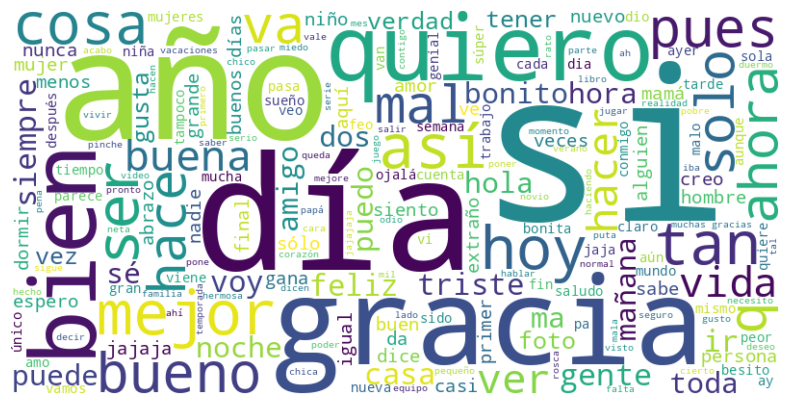

In [114]:
def generar_nube_palabras(df):
    all_text = []
    for text_list in df['Contents']:
        all_text.extend(text_list)
    palabras = ' '.join(all_text)
    nube = WordCloud(width=800, height=400, background_color='white').generate(palabras)
    plt.figure(figsize=(10, 5))
    plt.imshow(nube, interpolation='bilinear')
    plt.axis('off')
    plt.show()

generar_nube_palabras(tweets)

## 7. Conclusiones y Perspectiva de Negocios
En este taller, hemos explorado cómo el análisis de texto puede ofrecer información valiosa sobre el contenido y el sentimiento de los tweets. Reflexionemos sobre algunas preguntas de negocio:
- ¿Cómo podría utilizarse este análisis para mejorar la comunicación de la marca?
- ¿Qué ajustes se podrían hacer en una campaña de marketing si los tweets son predominantemente 'biased'?
- ¿Qué patrones importantes se podrían explorar en un análisis futuro (e.g., análisis de tendencias a lo largo del tiempo)?

 ¿Cómo podría utilizarse este análisis para mejorar la comunicación de la marca?

Al identificar temas y palabras asociadas con
 sesgos negativos hacia la marca, se pueden desarrollar estrategias para contrarrestar la narrativa negativa.  Por ejemplo:

 * Monitoreo continuo: Implementar un sistema de monitoreo de redes sociales para detectar tempranamente tweets con sesgos negativos.
 * Respuesta estratégica:  Desarrollar respuestas a los tweets sesgados, no solo para refutarlos, sino también para entablar un diálogo
   constructivo y abordar las preocupaciones planteadas por los usuarios.
 * Ajustes en la comunicación: Adaptar el mensaje de la marca para que resuene con la audiencia de manera más positiva, considerando
   los temas sensibles y las palabras que podrían generar controversia.
 * Campañas de concientización: Crear campañas que promuevan la inclusión, la diversidad y el respeto, para contrarrestar los sesgos negativos.
 * Análisis de la competencia: Analizar los tweets de la competencia para entender cómo manejan los comentarios sesgados y tomar ideas de
   las mejores prácticas.

 ¿Qué ajustes se podrían hacer en una campaña de marketing si los tweets son predominantemente 'biased'?

 Si los tweets sobre una campaña de marketing son predominantemente "biased", se deben hacer ajustes significativos en la estrategia,
 enfocándose en abordar los sesgos detectados.  Por ejemplo:

 * Revisar el mensaje principal: Si el análisis revela sesgos contra un grupo demográfico en particular, la campaña debe revisarse para
   asegurarse de no reforzar esos estereotipos o generar exclusión.
 * Diversificar el contenido: Incluir contenido que refleje diversidad en las representaciones y en los temas tratados.
 * Modificar el tono y el lenguaje:  Adaptar el tono y el lenguaje de la campaña para evitar generar controversias o polarización en la
   audiencia.

 ¿Qué patrones importantes se podrían explorar en un análisis futuro (e.g., análisis de tendencias a lo largo del tiempo)?

 En análisis futuros, sería crucial explorar patrones de tendencias a lo largo del tiempo, como:

 * Evolución de la polarización:  Verificar si la proporción de tweets "biased" ha aumentado o disminuido con el tiempo, y si hay momentos
   específicos en los que se intensifican los sesgos.
 * Análisis de hashtags y menciones: Identificar hashtags y menciones que son relevantes para la temática y analizar su evolución
   a lo largo del tiempo, para entender cómo cambia la conversación pública.
 * Análisis de influencers: Identificar y analizar los influencers que difunden información sesgada y observar su impacto en las
   conversaciones públicas.
 * Análisis de eventos específicos: Relacionar el incremento o disminución del sesgo en los tweets con la ocurrencia de eventos específicos,
   como el lanzamiento de un producto o una noticia.